Contributor: Coleen Anne Crisostomo

Polynomial projection lines for Philippine future capacity vs Projected future consumption

For Capacity in Solar Energy

In [510]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the data into the dataframe 
df =  pd.read_csv('Data\InstalledCapacity\RECAP_20220519-053554.csv')

df[df.Country == 'Philippines']

,Country,Technology,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
166,Philippines,Solar,0,0,0,0,2,2.02,2.02,2.02,...,2.02,3.047,27.737,172.55,784.145,908.376,916.961,982.246,1057.881,1369.734
167,Philippines,Wind,0,0,0,0,0,33,33,33,...,33,33,336.9,426.9,426.9,426.9,426.9,442.9,442.9,442.9


In [511]:
# Remove all other countries except Philippines
df = df.loc[df['Country'] == 'Philippines']
df_solar = df.loc[df['Technology'] == 'Solar']
df_solar

,Country,Technology,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
166,Philippines,Solar,0,0,0,0,2,2.02,2.02,2.02,...,2.02,3.047,27.737,172.55,784.145,908.376,916.961,982.246,1057.881,1369.734


In [512]:
# Remove Country and Technology columns in place
df_solar.drop(['Country', 'Technology'], axis=1, inplace=True)
df_solar


C:\Users\Nicole Madison\AppData\Local\Temp\ipykernel_7384\3373145515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solar.drop(['Country', 'Technology'], axis=1, inplace=True)


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
166,0,0,0,0,2,2.02,2.02,2.02,2.02,2.02,...,2.02,3.047,27.737,172.55,784.145,908.376,916.961,982.246,1057.881,1369.734


In [513]:
# Take the capacity values
y = df_solar.iloc[0].values
y = y.astype(float)
y

array([   0.   ,    0.   ,    0.   ,    0.   ,    2.   ,    2.02 ,
          2.02 ,    2.02 ,    2.02 ,    2.02 ,    2.02 ,    2.02 ,
          2.02 ,    3.047,   27.737,  172.55 ,  784.145,  908.376,
        916.961,  982.246, 1057.881, 1369.734])

In [514]:
# Take the years
X = df_solar.columns.values
X = X.astype(int)
X = X.reshape(-1, 1)
X

array([[2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]])

In [515]:
X.shape

(22, 1)

In [516]:
y.shape

(22,)

In [517]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [518]:
# Making predictions for years 2022 till 2040
linear_predict = np.array([])
years = np.array([[i] for i in range(2022, 2041, 1)])
X_linear = np.concatenate((X,years))
y_linear = np.copy(y)
for i in range(2022, 2041, 1):
   y_linear = np.concatenate((y_linear,lin_reg.predict([[i]])))

print(X_linear.shape)
print(y_linear.shape)

(41, 1)
(41,)


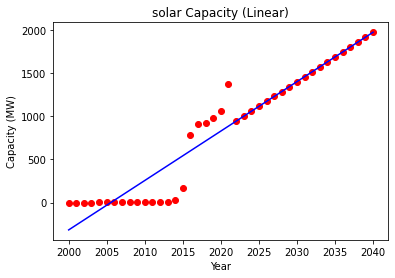

In [519]:
plt.scatter(X_linear,y_linear, color='red')
plt.plot(X_linear, lin_reg.predict(X_linear),color='blue')
plt.title("solar Capacity (Linear)")
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.show()

In [520]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

In [521]:
# Making predictions for years 2022 till 2040
poly_predict = np.array([])
years = np.array([[i] for i in range(2022, 2041, 1)])
X_poly = np.concatenate((X,years))
y_poly = np.copy(y)
for i in range(2022, 2041, 1):
   y_poly = np.concatenate((y_poly,lin_reg2.predict(poly_reg.fit_transform([[i]]))))

print(X_poly.shape)
print(y_poly.shape)

(41, 1)
(41,)


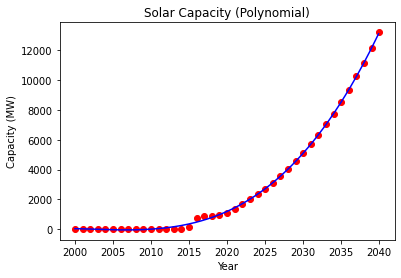

In [522]:
X_grid = np.arange(min(X_poly),max(X_poly),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X_poly,y_poly, color='red') 

plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 

plt.title("Solar Capacity (Polynomial)")
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.show()

For Consumption of Solar Energy

In [523]:
#read the data into the dataframe 
df1 = pd.read_excel (r'Data\ConsumptionPercentage\bp-stats-review-2021-all-data.xlsx', sheet_name='Solar Consumption - EJ')
df1

,Renewables: Consumption - Solar*,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Contents.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Growth rate per annum,NaN,Share,NaN,NaN
1,Exajoules (input-equivalent),1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2020,2009-19,2020,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036506,0.032164,0.033973,0.037592,0.039295,0.042461,0.433009,0.00517,NaN,NaN
4,Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001302,0.010668,0.028453,0.065667,0.105456,0.601543,0.74213,0.013875,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,n/a not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,"USSR includes CIS, Georgia, Ukraine and the Ba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,"# Excludes Estonia, Latvia and Lithuania pri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Notes: Annual changes and share of total are c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [524]:
# Take the data for Philippines
df1_solar = df1.iloc[99]
df1_solar

Renewables: Consumption - Solar*    Philippines
Unnamed: 1                                  0.0
Unnamed: 2                                  0.0
Unnamed: 3                                  0.0
Unnamed: 4                                  0.0
                                       ...     
Unnamed: 57                            0.094491
Unnamed: 58                            0.982831
Unnamed: 59                            0.001604
Unnamed: 60                                 NaN
Contents.1                                  NaN
Name: 99, Length: 62, dtype: object

In [525]:
# Check the consumption values for country Philippines
df1_solar = df1.iloc[99,0:57]
df1_solar

Renewables: Consumption - Solar*    Philippines
Unnamed: 1                                  0.0
Unnamed: 2                                  0.0
Unnamed: 3                                  0.0
Unnamed: 4                                  0.0
Unnamed: 5                                  0.0
Unnamed: 6                                  0.0
Unnamed: 7                                  0.0
Unnamed: 8                                  0.0
Unnamed: 9                                  0.0
Unnamed: 10                                 0.0
Contents                                    0.0
Unnamed: 12                                 0.0
Unnamed: 13                                 0.0
Unnamed: 14                                 0.0
Unnamed: 15                                 0.0
Unnamed: 16                                 0.0
Unnamed: 17                                 0.0
Unnamed: 18                                 0.0
Unnamed: 19                                 0.0
Unnamed: 20                             

In [526]:
# Take the consumption values from excel sheet into string list
df1_solar_row = df1.iloc[99,36:57].to_string(header=False, index=False)
df1_solar_row = df1_solar_row.split('\n')

# Convert the list into dataframe
df1_solar_row = [float(_.strip()) for _ in df1_solar_row]
y1 = pd.DataFrame(df1_solar_row, columns=['Consumption'])
y1 = y1.values
y1

array([[0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [1.5000e-05],
       [1.3000e-05],
       [1.3000e-05],
       [1.2000e-05],
       [1.2000e-05],
       [1.2000e-05],
       [1.1000e-05],
       [1.2000e-05],
       [1.3000e-05],
       [1.5100e-04],
       [1.2620e-03],
       [9.9320e-03],
       [1.0810e-02],
       [1.1176e-02],
       [1.1108e-02],
       [1.2191e-02]])

In [527]:
y1.shape

(21, 1)

In [528]:
# Check the years
df1_solar_columns = df1.iloc[1,36:57]
df1_solar_columns

Unnamed: 36    2000.0
Unnamed: 37    2001.0
Unnamed: 38    2002.0
Unnamed: 39    2003.0
Unnamed: 40    2004.0
Unnamed: 41    2005.0
Unnamed: 42    2006.0
Unnamed: 43    2007.0
Unnamed: 44    2008.0
Unnamed: 45    2009.0
Unnamed: 46    2010.0
Unnamed: 47    2011.0
Unnamed: 48    2012.0
Unnamed: 49    2013.0
Unnamed: 50    2014.0
Unnamed: 51    2015.0
Unnamed: 52    2016.0
Unnamed: 53    2017.0
Unnamed: 54    2018.0
Unnamed: 55    2019.0
Unnamed: 56    2020.0
Name: 1, dtype: object

In [529]:
# Take the year values from excel sheet into string list
df1_solar_columns = df1.iloc[1,36:58].to_string(header=False, index=False)
df1_solar_columns = df1_solar_columns.split('.0\n')

# Convert the list into dataframe
df1_solar_columns = [int(_.strip()) for _ in df1_solar_columns]
X1 = pd.DataFrame(df1_solar_columns, columns=['Years'])
X1 = X1['Years'].unique()
X1 = X1.reshape(-1,1)
X1

array([[2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020]], dtype=int64)

In [530]:
X1.shape

(21, 1)

In [531]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1,y1)

LinearRegression()

In [532]:
# Making predictions for years 2022 till 2040
linear_predict = np.array([])
years = np.array([[i] for i in range(2021, 2041, 1)])
X1_linear = np.concatenate((X1,years))
y1_linear = np.copy(y1)
for i in range(2021, 2041, 1):
   y1_linear = np.concatenate((y1_linear,lin_reg.predict([[i]])))

print(X1_linear.shape)
print(y1_linear.shape)

(41, 1)
(41, 1)


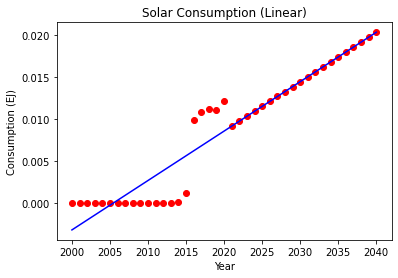

In [533]:
plt.scatter(X1_linear,y1_linear, color='red')
plt.plot(X1_linear, lin_reg.predict(X1_linear),color='blue')
plt.title("Solar Consumption (Linear)")
plt.xlabel('Year')
plt.ylabel('Consumption (EJ)')
plt.show()

In [534]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X1_poly = poly_reg.fit_transform(X1)
lin_reg2 = LinearRegression()
lin_reg2.fit(X1_poly,y1)

LinearRegression()

In [535]:
# Making predictions for years 2021 till 2040
poly_predict = np.array([])
years = np.array([[i] for i in range(2021, 2041, 1)])
X1_poly = np.concatenate((X1,years))
y1_poly = np.copy(y1)
for i in range(2021, 2041, 1):
   y1_poly = np.concatenate((y1_poly,lin_reg2.predict(poly_reg.fit_transform([[i]]))))

print(X1_poly.shape)
print(y1_poly.shape)

(41, 1)
(41, 1)


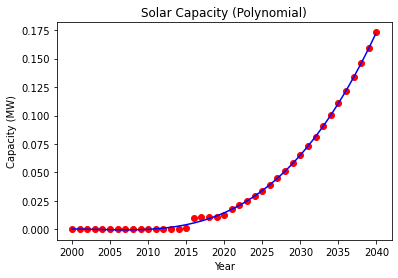

In [536]:
X1_grid = np.arange(min(X1_poly),max(X1_poly),0.1)
X1_grid = X1_grid.reshape(len(X1_grid),1) 
plt.scatter(X1_poly,y1_poly, color='red') 

plt.plot(X1_grid, lin_reg2.predict(poly_reg.fit_transform(X1_grid)),color='blue') 

plt.title("Solar Capacity (Polynomial)")
plt.xlabel('Year')
plt.ylabel('Capacity (MW)')
plt.show()